In [35]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [36]:
df = pd.read_csv("Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])

In [37]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [38]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [39]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [56]:
X = df.iloc[:,1:3]
y = df['Survived']

In [57]:
X

,Age,Fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


In [58]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
X_train.head()

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750


In [61]:
y_train.sample(5)

454    0
51     0
260    0
596    1
376    1
Name: Survived, dtype: int64

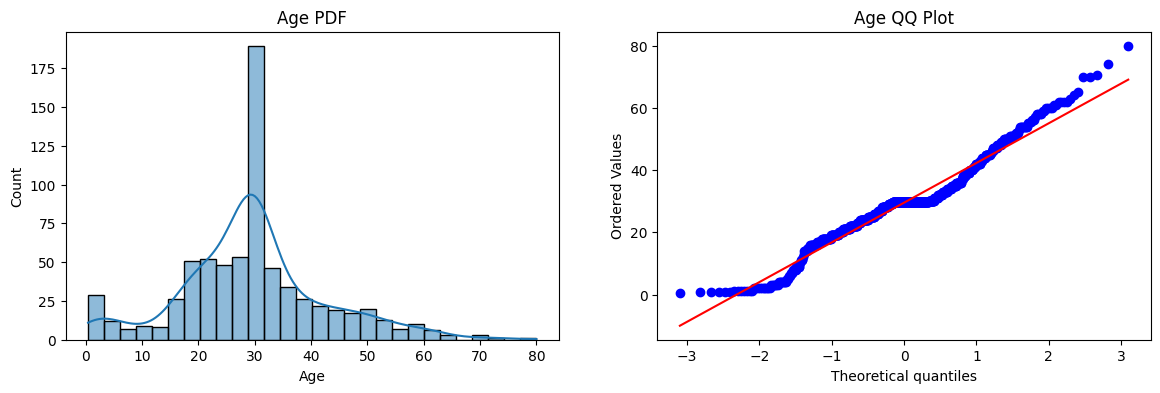

In [62]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

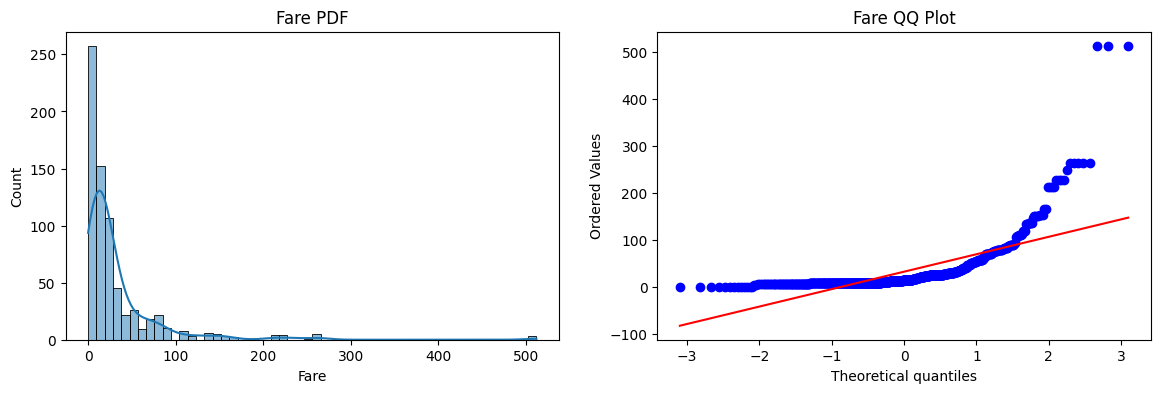

In [63]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [65]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [66]:
# direct modeling and no data processing
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)
    
y_pred = clf1.predict(X_test)
y_pred1 = clf2.predict(X_test)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6703910614525139


In [67]:
# applying Function_transformers
trf = FunctionTransformer(func=np.log1p)

In [71]:
X_train_transformed = trf.fit_transform(X_train[['Fare']])
X_test_transformed = trf.transform(X_test[['Fare']])

In [72]:
X_train_transformed

,Fare
331,3.384390
733,2.639057
382,2.188856
704,2.180892
813,3.474293
...,...
106,2.157559
270,3.465736
860,2.715244
435,4.795791


In [73]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


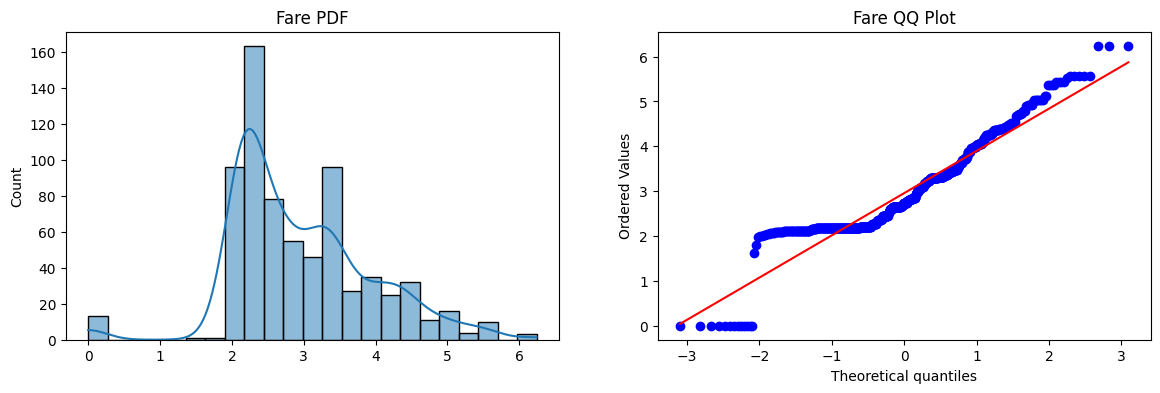

In [82]:
plt.figure(figsize=(14,4))
fare_train = X_train_transformed.values.ravel()
plt.subplot(121)
sns.histplot(fare_train, kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

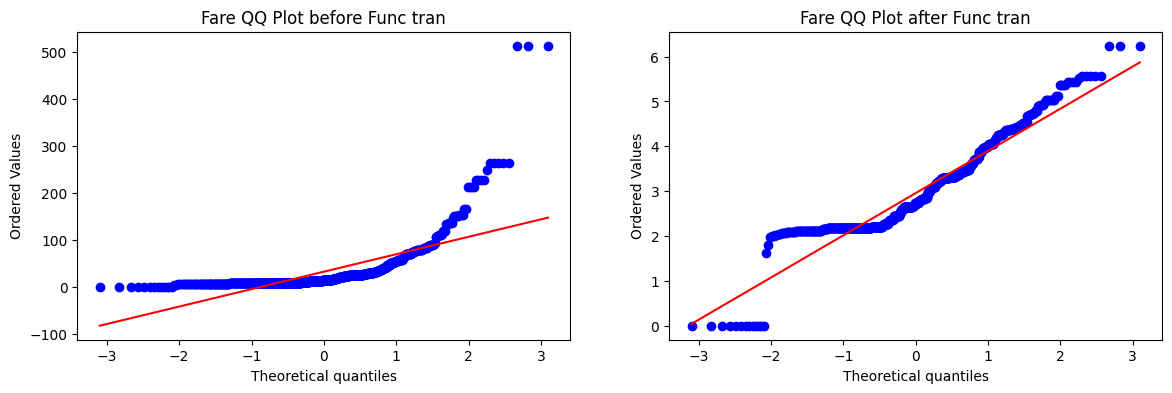

In [88]:
plt.figure(figsize=(14,4))
# fare_train = X_train_transformed.values.ravel()
plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot before Func tran')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot after Func tran')

plt.show()

In [78]:
X_train_transformed.values 

array([[3.38439026],
       [2.63905733],
       [2.18885633],
       [2.18089192],
       [3.47429294],
       [5.51552654],
       [3.31600254],
       [3.3576216 ],
       [2.18557926],
       [3.59731226],
       [2.63905733],
       [3.2248579 ],
       [2.58588257],
       [2.08619369],
       [2.35137526],
       [3.29583687],
       [4.51085951],
       [5.43164561],
       [2.63905733],
       [4.06044301],
       [3.47429294],
       [1.97927584],
       [2.26825241],
       [3.30505352],
       [2.35967406],
       [2.1076888 ],
       [3.15095238],
       [2.34978351],
       [4.79579055],
       [2.73814608],
       [2.20276476],
       [5.35894199],
       [2.1102132 ],
       [4.51085951],
       [2.16619247],
       [3.27588734],
       [3.09444575],
       [3.4339872 ],
       [4.13323189],
       [3.29583687],
       [2.1102132 ],
       [2.18557926],
       [2.63905733],
       [3.05459063],
       [3.44998755],
       [2.08567209],
       [2.74084002],
       [2.142

In [81]:
X_train_transformed.values.ravel()

array([3.38439026, 2.63905733, 2.18885633, 2.18089192, 3.47429294,
       5.51552654, 3.31600254, 3.3576216 , 2.18557926, 3.59731226,
       2.63905733, 3.2248579 , 2.58588257, 2.08619369, 2.35137526,
       3.29583687, 4.51085951, 5.43164561, 2.63905733, 4.06044301,
       3.47429294, 1.97927584, 2.26825241, 3.30505352, 2.35967406,
       2.1076888 , 3.15095238, 2.34978351, 4.79579055, 2.73814608,
       2.20276476, 5.35894199, 2.1102132 , 4.51085951, 2.16619247,
       3.27588734, 3.09444575, 3.4339872 , 4.13323189, 3.29583687,
       2.1102132 , 2.18557926, 2.63905733, 3.05459063, 3.44998755,
       2.08567209, 2.74084002, 2.14251023, 5.02749241, 3.29583687,
       2.18885633, 3.09104245, 5.57357887, 2.1690537 , 2.1076888 ,
       2.26825241, 2.17190677, 4.39444915, 2.38339981, 5.43164561,
       2.59151638, 0.        , 3.29583687, 2.1071783 , 2.26825241,
       2.00653477, 2.35137526, 2.20276476, 2.18557926, 2.1102132 ,
       3.44998755, 2.60083612, 3.29583687, 2.1690537 , 2.10768

In [91]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6599625468164795


In [92]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6431335830212235


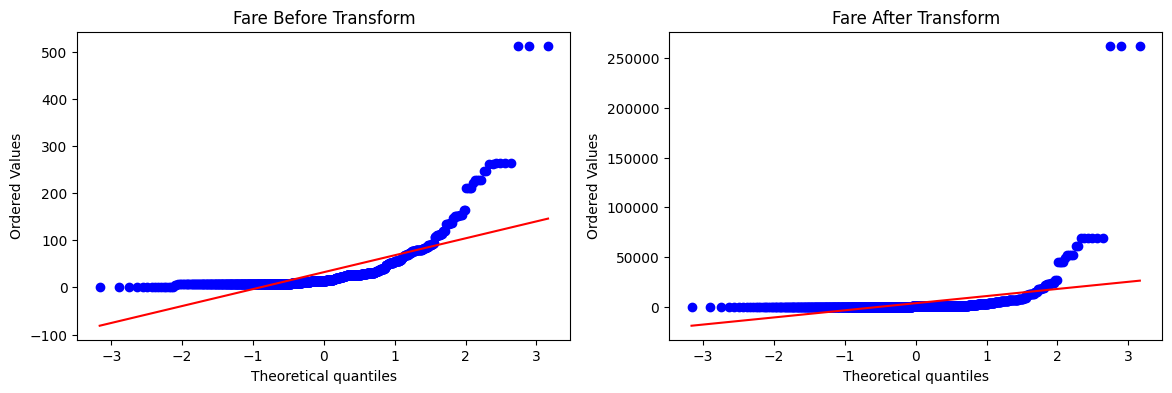

Accuracy 0.6589013732833957


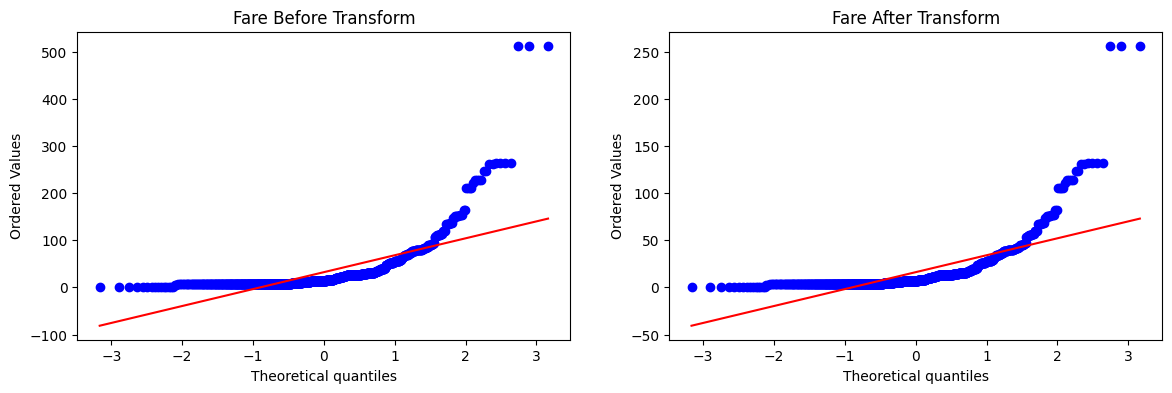

Accuracy 0.6150561797752809


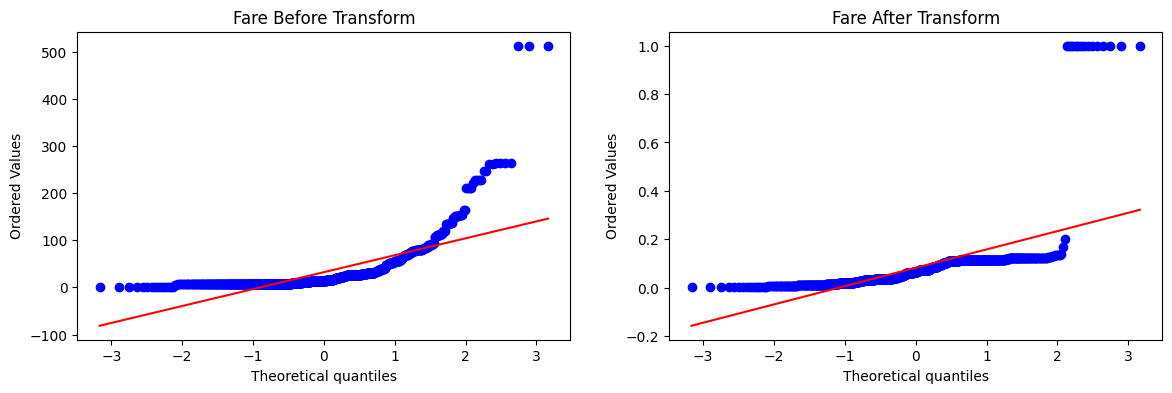

In [105]:
# apply_transform(np.sin)
apply_transform(lambda x : x**2)
apply_transform(lambda x : x**1/2)
apply_transform(lambda x : 1/(x+1))